# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
import sys
from collections import Counter
# Let us welcome SciPy!
from scipy.stats import trim_mean, mode, skew, gaussian_kde, pearsonr, spearmanr

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [2]:
# your answer here
temp = pd.read_csv("Temp_States.csv")

#### Print `temp`

In [3]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [4]:
temp.dtypes

City            object
State           object
Temperature    float64
dtype: object

In [5]:
temp.columns 

Index(['City', 'State', 'Temperature'], dtype='object')

In [6]:
print("temp[City] :es una variable cualitativa nominal")

temp[City] :es una variable cualitativa nominal


In [7]:
print("temp[ State] :es una variable cualitativa nominal")

temp[ State] :es una variable cualitativa nominal


In [8]:
print("temp[ Temperature] : es una variable cuantitativa continua")

temp[ Temperature] : es una variable cuantitativa continua


#### Select the rows where state is New York

In [9]:
temp[temp[ 'State']== "New York"]

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [10]:
# your answer here
temp[temp[ 'State']== "New York"].mean()

Temperature    10.740741
dtype: float64

#### We want to know cities and states with Temperature above 15 degress Celcius

In [11]:
# your answer here
temp[temp[ 'Temperature'] > 15]

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [12]:
# your answer here
city = temp.loc[:,['City', 'Temperature']] 
city15 = city[city[ 'Temperature'] > 15]
city15

,City,Temperature
0,NYC,19.444444
3,Hartford,17.222222
5,Treton,22.222222
6,Newark,20.000000


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [13]:
# your answer here
city15[city15[ 'Temperature'] < 20]

,City,Temperature
0,NYC,19.444444
3,Hartford,17.222222


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [14]:
temp[ 'State'].unique()

array(['New York', 'Connecticut', 'New Jersey'], dtype=object)

In [15]:
print(f"New York mean = {temp[temp[ 'State']== 'New York'].mean().round(2)}")
print(f"New York standard deviation = {temp[temp[ 'State']== 'New York'].std().round(2)}")

New York mean = Temperature    10.74
dtype: float64
New York standard deviation = Temperature    8.13
dtype: float64


In [16]:
print(f"Connecticut mean = {temp[temp[ 'State']== 'Connecticut'].mean().round(2)}")
print(f"Connecticut standard deviation = {temp[temp[ 'State']== 'Connecticut'].std().round(2)}")

Connecticut mean = Temperature    15.83
dtype: float64
Connecticut standard deviation = Temperature    1.96
dtype: float64


In [17]:
print(f"New Jersey mean = {temp[temp[ 'State']== 'New Jersey'].mean().round(2)}")
print(f"New Jersey standard deviation = {temp[temp[ 'State']== 'New Jersey'].std().round(2)}")

New Jersey mean = Temperature    21.11
dtype: float64
New Jersey standard deviation = Temperature    1.57
dtype: float64


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [18]:
# your answer here
employee = pd.read_csv("employee.csv")

#### Explore the data types of the Temp dataframe. Comment your results

In [19]:
# your answer here
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


In [20]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9 non-null      object
 1   Department  9 non-null      object
 2   Education   9 non-null      object
 3   Gender      9 non-null      object
 4   Title       9 non-null      object
 5   Years       9 non-null      int64 
 6   Salary      9 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 632.0+ bytes


In [21]:

#Name : variable cualitativa y nominal
#Department : variable cualitativa y nominal
#Education: variable cualitativa y ordinal
#Gender: variable cualitativa y nominal
#Title : cualitativa y nominal ordinal
#Years : cuantitativa y continua
#Salary : cuantitativa y continua


#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

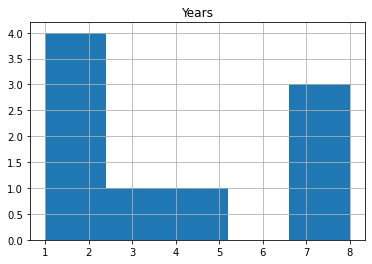

In [22]:
# your answer here
#Histograma con pandas 
employee.hist('Years', bins='auto');

<AxesSubplot:xlabel='Years', ylabel='Count'>

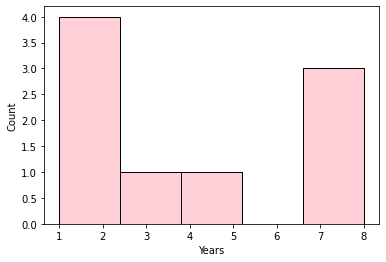

In [23]:
#Histograma con seanborn.
sns.histplot(employee.Years, color = "pink" )

#### What's the average salary in this company?

In [24]:
# your answer here
employee.Salary.mean().round(3)

48.889

#### What's the highest salary?

In [25]:
# your answer here
employee.Salary.max()

70

#### What's the lowest salary?

In [26]:
# your answer here
employee.Salary.min()

30

#### Who are the employees with the lowest salary?

In [27]:
# your answer here
employee[employee["Salary"] == 30]

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Could you give all the information about an employee called David?

In [28]:
# your answer here
employee[employee["Name"] == "David"]

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [29]:
# your answer here

# No sé si la manera de sacar la respuesta es la correcta o hay otra.
employee["Salary"][2]

30

#### Print all the rows where job title is associate

In [30]:
# your answer here
employee[employee["Title"] == "associate"]

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [31]:
# your answer here- 1 method
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [32]:
# your answer here- 2nd method
employee[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [33]:
# your answer here
emp_aso = employee[employee["Title"]== "associate"]  
emp_aso[emp_aso["Salary"] > 55]

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [34]:
# your answer here
mean_emp = employee.groupby("Years").mean()
mean_emp

,Salary
Years,
1,35.000000
2,38.333333
3,55.000000
4,35.000000
7,60.000000
8,70.000000


####  What is the average Salary per title?

In [35]:
employee.Title.unique()

array(['analyst', 'associate', 'VP'], dtype=object)

In [36]:
# your answer here
employee[employee["Title"]== "analyst"]["Salary"].mean()

32.5

In [37]:
employee[employee["Title"]== "associate"]["Salary"].mean()

56.666666666666664

In [38]:
employee[employee["Title"]== "VP"]["Salary"].mean()

70.0

#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

In [39]:
employee.columns

Index(['Name', 'Department', 'Education', 'Gender', 'Title', 'Years',
       'Salary'],
      dtype='object')

<AxesSubplot:xlabel='Salary'>

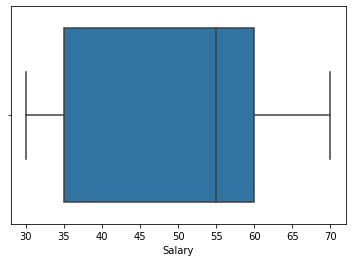

In [40]:
# draw boxplot here
sns.boxplot(x="Salary",  
            data = employee)

In [41]:
# print first quartile here
employee.Salary.quantile(0.25)

35.0

In [42]:
# print third quartile here
employee.Salary.quantile(0.75)

60.0

#### Is the mean salary per gender different?

<AxesSubplot:xlabel='Salary', ylabel='Gender'>

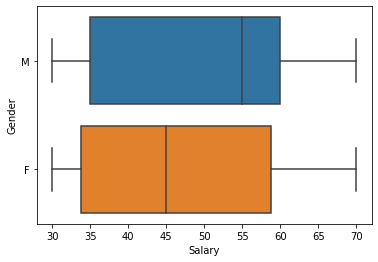

In [43]:
# your answer here
sns.boxplot(x="Salary",  
            data = employee, 
            y= 'Gender')

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [44]:
# your answer here
employee.Department.unique()

array(['IT', 'HR', 'Sales'], dtype=object)

In [45]:
employee.groupby("Department").agg({"Years":[np.mean,max, min], "Salary":[np.mean,max, min]})

Years         Salary        
                mean max min   mean max min
Department                                 
HR          4.666667   8   2  45.00  70  30
IT          4.500000   8   1  48.75  70  30
Sales       2.500000   3   2  55.00  55  55

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [46]:
# your answer here
employee.groupby("Department")["Salary"].apply(lambda x: x.max()- x.min()) 

Department
HR       40
IT       40
Sales     0
Name: Salary, dtype: int64

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [47]:
# your answer here
orders= pd.read_csv("Orders.csv")

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [48]:
# your answer here
orders.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [49]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    397924 non-null  int64  
 1   InvoiceNo     397924 non-null  int64  
 2   StockCode     397924 non-null  object 
 3   year          397924 non-null  int64  
 4   month         397924 non-null  int64  
 5   day           397924 non-null  int64  
 6   hour          397924 non-null  int64  
 7   Description   397924 non-null  object 
 8   Quantity      397924 non-null  int64  
 9   InvoiceDate   397924 non-null  object 
 10  UnitPrice     397924 non-null  float64
 11  CustomerID    397924 non-null  int64  
 12  Country       397924 non-null  object 
 13  amount_spent  397924 non-null  float64
dtypes: float64(2), int64(8), object(4)
memory usage: 42.5+ MB


In [50]:
# your answer here
orders.describe()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


####  What is the average Purchase Price?

In [51]:
# your answer here
total_invoice = orders.groupby("InvoiceNo").sum()
total_invoice.head(8)

,Unnamed: 0,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
InvoiceNo,,,,,,,,,
536365,21,14070,84,21,56,40,27.37,124950,139.12
536366,15,4020,24,6,16,12,3.70,35700,22.20
536367,174,24120,144,36,96,83,58.24,156564,278.73
536368,90,8040,48,12,32,15,19.10,52188,70.05
536369,25,2010,12,3,8,3,5.95,13047,17.85
536370,710,40200,240,60,160,449,55.29,251660,855.86
536371,46,2010,12,3,9,80,2.55,13748,204.00
536372,95,4020,24,6,18,12,3.70,35700,22.20


In [52]:
total_invoice["amount_spent"].mean().round(4)

480.7622

#### What were the highest and lowest purchase prices? 

In [53]:
# your answer here
total_invoice["amount_spent"].max().round(4)

168469.6

In [54]:
# your answer here
total_invoice["amount_spent"].min().round(4)

0.0

#### Select all the customers we have in Spain

In [55]:
# your answer here
spain = orders[orders["Country"] == "Spain"]
cust_spain = spain.groupby("CustomerID").sum()
cust_spain.head(3)

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,amount_spent
CustomerID,,,,,,,,,
12354,9645139,31952838,116638,232,232,754,530,261.22,1079.40
12417,3938336,12682154,46253,92,92,299,267,72.05,436.30
12421,11812978,25167687,90495,282,178,538,484,203.41,807.04


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [56]:
# your answer here
len(cust_spain)

30

#### Select all the customers who have bought more than 50 items ?

In [57]:
# your answer here
items = total_invoice[total_invoice["Quantity"]> 50]
items.head(8)

,Unnamed: 0,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
InvoiceNo,,,,,,,,,
536367,174,24120,144,36,96,83,58.24,156564,278.73
536370,710,40200,240,60,160,449,55.29,251660,855.86
536371,46,2010,12,3,9,80,2.55,13748,204.00
536373,904,32160,192,48,144,88,53.11,285600,259.86
536375,1176,32160,192,48,144,88,53.11,285600,259.86
536376,165,4020,24,6,18,112,6.00,30582,328.80
536378,1805,38190,228,57,171,454,33.35,279072,444.98
536381,4305,70350,420,105,315,198,88.20,535885,449.98


#### Select orders from Spain that are above 50 items

In [58]:
# your answer here
items_spain = cust_spain[cust_spain["Quantity"] > 50]
items_spain.head(8)

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,amount_spent
CustomerID,,,,,,,,,
12354,9645139,31952838,116638,232,232,754,530,261.22,1079.40
12417,3938336,12682154,46253,92,92,299,267,72.05,436.30
12421,11812978,25167687,90495,282,178,538,484,203.41,807.04
12442,6377106,6971460,24132,144,24,168,182,40.08,172.06
12445,1915882,2308500,8044,44,16,72,62,31.95,133.40
12448,9246897,12603492,44242,220,66,286,243,130.94,449.45
12450,1898462,4462114,16088,50,48,112,128,12.94,197.88
12454,5979495,8568825,30165,150,75,255,1006,109.23,3528.34


#### Select all free orders

In [59]:
# your answer here
free_orde = orders[orders["UnitPrice"]== 0]
free_orde.head(6)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
34494,56674,541109,22168,2011,1,4,15,organiser wood antique white,1,2011-01-13 15:10:00,0.0,15107,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [60]:
# your answer here
lunch_bag = orders[orders["Description"].str.contains('lunch bag')]
lunch_bag.head(6)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30
361,370,536401,20726,2010,12,3,11,lunch bag woodland,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [61]:
# your answer here
lunch_bag[lunch_bag["year"]==2011].head(3)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.5
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.5
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.3


#### Show the frequency distribution of the amount spent in Spain.

In [68]:
# your answer here
Counter(cust_spain["amount_spent"])

Counter({1079.4: 1,
         436.29999999999995: 1,
         807.0400000000002: 1,
         172.06: 1,
         133.4: 1,
         449.4500000000001: 1,
         197.88: 1,
         3528.34: 1,
         767.9600000000006: 1,
         1189.5900000000001: 1,
         4541.720000000001: 1,
         3723.87: 1,
         1304.81: 1,
         982.5700000000002: 1,
         363.95: 1,
         5568.349999999995: 1,
         13400.23999999999: 1,
         981.1800000000002: 1,
         372.7: 1,
         1000.3899999999999: 1,
         1161.5: 1,
         207.8: 1,
         95.19999999999999: 1,
         964.8299999999994: 1,
         168.0: 1,
         603.7099999999997: 1,
         11990.96: 1,
         618.27: 1,
         3811.2200000000016: 1,
         954.4199999999997: 1})

#### Select all orders made in the month of August

In [77]:
# your answer here
agost= orders[orders["month"]== 8]

#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [80]:
# your answer here
agost["Country"].value_counts().head(5)

United Kingdom    23105
Germany             795
EIRE                593
France              569
Netherlands         280
Name: Country, dtype: int64

#### What's the  average amount of money spent by country

In [86]:
# your answer here
count_mean = orders.groupby("Country")["amount_spent"].mean()
count_mean.head (5)

Country
Australia    116.895620
Austria       25.624824
Bahrain       32.258824
Belgium       20.283772
Brazil        35.737500
Name: amount_spent, dtype: float64

#### What's the most expensive item?

In [101]:
# your answer here
orders["UnitPrice"].max()

8142.75

In [102]:
orders[orders["UnitPrice"]==8142.75]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
118352,173382,551697,POST,2011,5,2,13,postage,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom,8142.75


#### What was the average amount spent per year ?

In [103]:
# your answer here
orders.groupby("year")["amount_spent"].mean()

year
2010    21.892733
2011    22.430074
Name: amount_spent, dtype: float64